In [3]:
!pip install pandas


Defaulting to user installation because normal site-packages is not writeable
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
    --------------------------------------- 0.3/11.1 MB ? eta -:--:--
    --------------------------------------- 0.3/11.1 MB ? eta -:--:--
    --------------------------------------- 0.3/11.1 MB ? eta -:--:--
    --------------------------------------- 0.3/11.1 MB ? eta -:--:--
    ---------------

In [5]:
!pip install seaborn


Defaulting to user installation because normal site-packages is not writeable
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


In [41]:
!pip install scikit-learn


Defaulting to user installation because normal site-packages is not writeable
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/11.2 MB ? eta -:--:--
    --------------------------------------- 0.3/11.2 MB ? eta -:--:--
   -- ------------------------------------- 0.8/11.2 MB 2.6 MB/s eta 0:00:05
   --- ------------------------------------ 1.0/11.2 MB 2.4 MB/s eta 0:00:05
   --- ------------------------------------ 1.0/11.2 MB 2.4 MB/s eta 0:00:05
   ---- ----------------------------------- 1.3/11.2 MB 1.2 MB/s eta 0:00:09
   ------ --------------------------------- 1.8/11.2 MB 1.4 MB/s eta 0:00:07
   ------- -------------------------------- 2.1/11.2 MB 1.4 MB/s eta 0:00:07
   --------- ------------------------------ 2.6/11.2 MB 1.6 MB/s eta 0:00:06
   ----------- ---------------------------- 3.1/11.2 MB 1.7 MB/s eta 0:00:05
   ------------ --------------------------- 3.4/11.2 MB 1.6 MB/s eta 0:00:05
   -------------- --

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
import warnings
warnings.filterwarnings("ignore")

In [8]:
data=pd.read_csv(r"C:\Users\reyha\Desktop\data science class\CustomerSegmentation\Customers.csv")

In [9]:
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [26]:
data.rename(columns={
  	"Annual Income (k$)":"Annual Income" ,
    "Spending Score (1-100)":"Spending Score"
},inplace=True)

In [27]:
data.isnull().sum()

CustomerID        0
Gender            0
Age               0
Annual Income     0
Spending Score    0
dtype: int64

In [28]:
data.dtypes

CustomerID         int64
Gender            object
Age                int64
Annual Income      int64
Spending Score     int64
dtype: object

In [29]:
data.Gender[data.Gender=="Male"]=1
data.Gender[data.Gender=="Female"]=0


In [30]:
data.head()

,CustomerID,Gender,Age,Annual Income,Spending Score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [32]:
data=data.astype("int64")

In [36]:
data.dtypes

CustomerID        int64
Gender            int64
Age               int64
Annual Income     int64
Spending Score    int64
dtype: object

In [37]:
data_seg=data.drop(columns="CustomerID").copy()

In [42]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [43]:
data_seg=scaler.fit_transform(data_seg)

In [44]:
from sklearn.cluster import KMeans

In [45]:
model= KMeans()

In [46]:
wcss=[[],[]]
for n in range(2,15):
    model=KMeans(n_clusters=n)
    model.fit(data_seg)
    inertia=model.inertia_
    wcss[0].append(n)
    wcss[1].append(inertia)

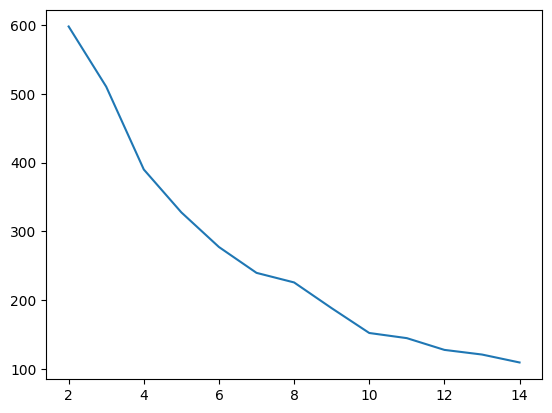

In [47]:
plt.plot(wcss[0],wcss[1])

In [49]:
!pip install yellowbrick


Defaulting to user installation because normal site-packages is not writeable


In [50]:
from yellowbrick.cluster import KElbowVisualizer

In [51]:
model=KMeans()

KElbowVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=14), k=(2, 15))

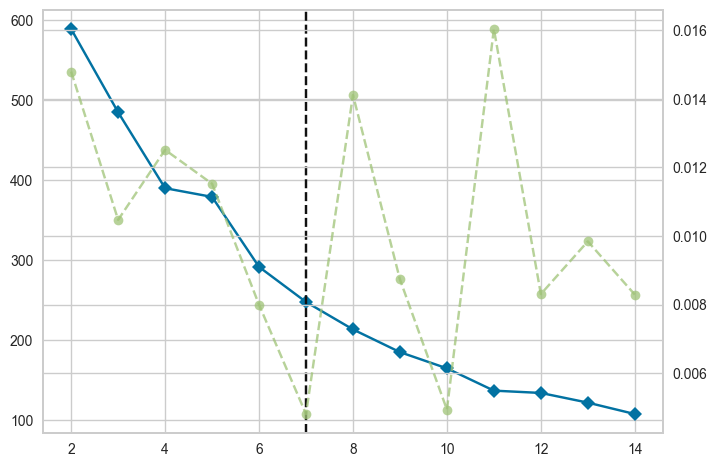

In [57]:
vis=KElbowVisualizer(model,k=(2,15),random_size=123)
vis.fit(data_seg)

In [58]:
model=KMeans(n_clusters=7)
model.fit(data_seg)

KMeans(n_clusters=7)

In [61]:
data["cluster"]=model.labels_

In [62]:
data

,CustomerID,Gender,Age,Annual Income,Spending Score,cluster
0,1,1,19,15,39,2
1,2,1,21,15,81,2
2,3,0,20,16,6,1
3,4,0,23,16,77,1
4,5,0,31,17,40,1
...,...,...,...,...,...,...
195,196,0,35,120,79,3
196,197,0,45,126,28,4
197,198,1,32,126,74,3
198,199,1,32,137,18,6


In [66]:
describe=data.drop(columns="CustomerID").groupby("cluster").describe()

In [67]:
describe[["Age","Spending Score"]]

Age                                                      \
        count       mean        std   min   25%   50%   75%   max   
cluster                                                             
0        39.0  50.307692   9.081948  35.0  45.0  49.0  54.5  68.0   
1        37.0  25.945946   5.152917  18.0  22.0  24.0  31.0  35.0   
2        39.0  28.538462   7.358655  18.0  21.5  28.0  35.0  40.0   
3        24.0  32.000000   2.934058  27.0  30.0  31.5  33.5  38.0   
4        15.0  44.600000   7.660660  34.0  39.0  44.0  49.5  57.0   
5        27.0  58.037037   8.942042  37.0  50.5  59.0  66.5  70.0   
6        19.0  38.473684  12.001706  19.0  32.5  40.0  46.5  59.0   

        Spending Score                                                       
                 count       mean        std   min    25%   50%   75%   max  
cluster                                                                      
0                 39.0  41.179487  15.243414   5.0  33.50  45.0  52.0  59.0  
1                 37.0  57.459459  20.539386   6.0  42.00  54.0  73.0  99.0  
2                 39.0  69.128205  17.614557  35.0  55.00  69.0  85.0  97.0  
3                 24.0  82.041667   8.126602  69.0  74.75  83.0  88.0  97.0  
4                 15.0  21.600000   9.701252   5.0  16.00  22.0  27.5  39.0  
5                 27.0  38.851852  18.129245   3.0  32.50  46.0  51.0  60.0  
6                 19.0  14.210526   9.801241   1.0   8.50  13.0  17.5  36.0

0         Axes(0.1,0.679412;0.235294x0.220588)
1    Axes(0.382353,0.679412;0.235294x0.220588)
2    Axes(0.664706,0.679412;0.235294x0.220588)
3         Axes(0.1,0.414706;0.235294x0.220588)
4    Axes(0.382353,0.414706;0.235294x0.220588)
5    Axes(0.664706,0.414706;0.235294x0.220588)
6             Axes(0.1,0.15;0.235294x0.220588)
dtype: object

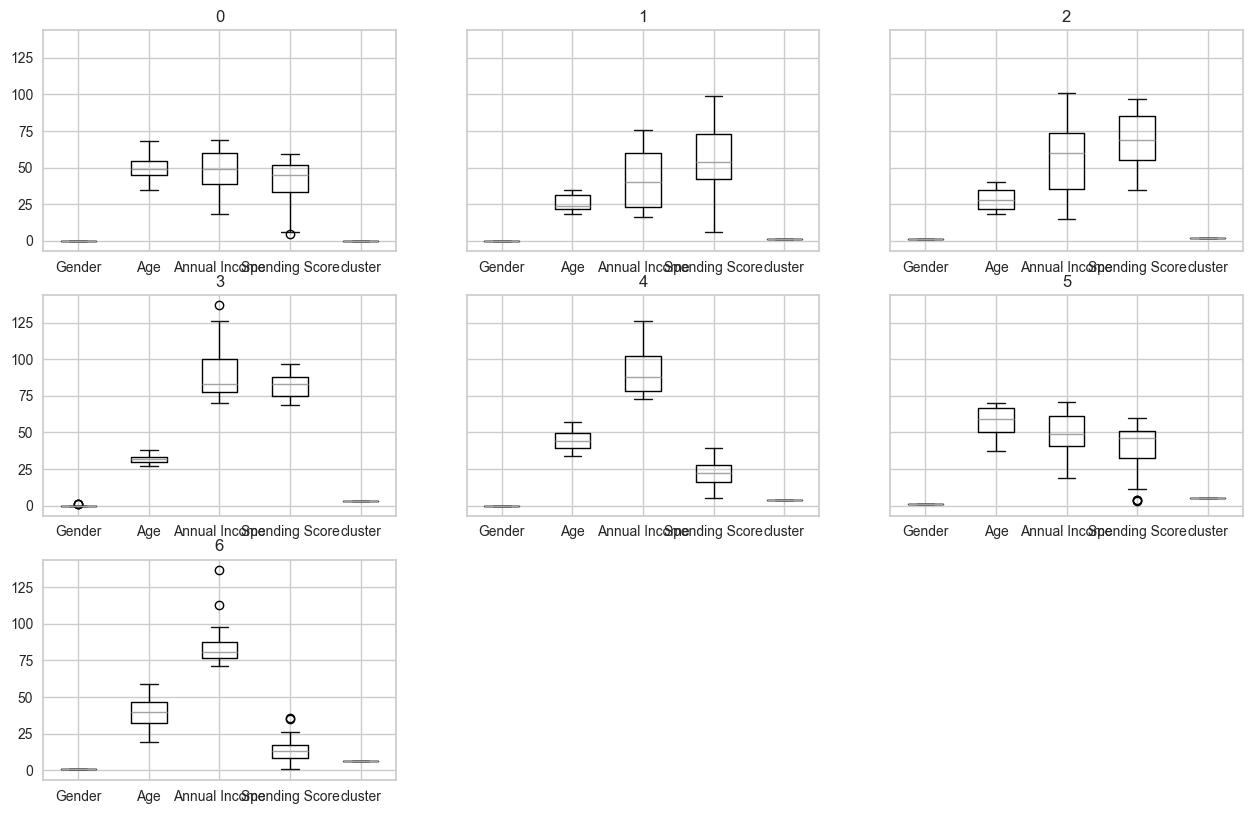

In [72]:
data.drop(columns="CustomerID").groupby("cluster").boxplot(figsize=(15,10))